# Laboratorio: Il frattale di Mandelbrot

In questo laboratorio vedremo come sia possibile visualizzare il celebre **Frattale di Mandelbrot** rappresentato nella figura sotto.

<div style="text-align: center;">

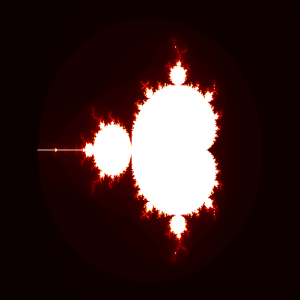

</div>


Questa figura si ottiene colorando sul piano i punti che appartengono (o non appartengono) all'**insieme di Mandelbrot**.

L'insieme di Mandelbrot è composto da tutti i numeri complessi c per cui una particolare successione rimane limitata.
In particolare, per ogni numero complesso c = X + iY (dove X e Y sono le coordinate sul piano), definiamo la successione:

z₀ = 0

z_{n+1} = z_n² + c

Scritta in termini di coordinate reali (x_n, y_n), dove z_n = x_n + iy_n, la successione diventa:

x_{n+1} = x_n² - y_n² + X

y_{n+1} = 2 x_n y_n + Y

con (X, Y) il punto di cui vogliamo testare l'appartenenza all'insieme e (x₀, y₀) = (0, 0).

Un punto c = (X, Y) appartiene all'insieme di Mandelbrot se la successione che parte da z₀ = 0 rimane **limitata**, cioè i punti della successione restano sempre all'interno di una regione finita del piano. Al contrario, se la successione si allontana indefinitamente dall'origine, il punto c non appartiene all'insieme.


## Implementazione pratica

Poiché non possiamo calcolare infiniti termini della successione, useremo un criterio pratico: un punto viene considerato **nell'insieme di Mandelbrot** se dopo n iterazioni (ad esempio 100) la distanza dall'origine sqrt(x_n² + y_n²) non ha mai superato il valore 2.

Si può dimostrare matematicamente che se la distanza supera 2, la successione divergerà sicuramente all'infinito.

---

**Nota**: Per creare l'effetto visivo del frattale, coloreremo i punti in base al numero di iterazioni necessarie prima che la distanza superi 2. Questo creerà le sfumature caratteristiche che hanno reso famoso questo frattale.

### Passo 1: Verificare se un punto (x, y) appartiene all'insieme di Mandelbrot

Implementiamo una funzione che, date le coordinate (x, y) di un punto sul piano complesso, verifichi se appartiene o meno all'insieme di Mandelbrot.

#### Specifiche della funzione

La funzione `appartiene_mandelbrot(x, y, max_iter=100)` dovrà:

1. Inizializzare la successione partendo da (x₀, y₀) = (0, 0)
2. Iterare al massimo `max_iter` volte, calcolando ad ogni passo:
   - x_{n+1} = x_n² - y_n² + x
   - y_{n+1} = 2 * x_n * y_n + y
3. Ad ogni iterazione, verificare se la distanza dall'origine supera 2
4. Restituire `True` se dopo tutte le iterazioni la distanza non ha mai superato 2, `False` altrimenti
5. Per evitare di calcolare la radice quadrata, confronta x_n² + y_n² con 4


#### Implementa la tua soluzione
```python
def appartiene_mandelbrot(x: float, y: float, max_it: int=100) -> bool:
    """
    Verifica se il punto (x, y) appartiene all'insieme di Mandelbrot.
    
    Parametri:
    - x, y: coordinate del punto da testare
    - max_iter: numero massimo di iterazioni
    
    Ritorna:
    - True se il punto appartiene all'insieme, False altrimenti
    """
    # Il tuo codice qui
```

In [ ]:
# Implementazione
def appartiene_mandelbrot(x: float, y: float, max_it: int=100) -> bool:
    
    pass

In [ ]:
# Esempio
x_0, y_0 = -0.5, 0.0
print(appartiene_mandelbrot(x_0, y_0))
x_1, y_1 = 0.5, 0.5
print(appartiene_mandelbrot(x_1, y_1))


### Passo 2: Creare una griglia di valori da testare

Per visualizzare il frattale di Mandelbrot dobbiamo testare molti punti del piano complesso. Creiamo quindi una **griglia di punti** nell'intervallo che ci interessa.

#### 2.1 Creare una sequenza di valori sull'asse X

**Obiettivo:** Creare codice che divide l'intervallo [x_min, x_max] in x_steps parti uguali.

**Esempio:** Dividere l'intervallo [-2.0, 2.0] in 4 intervalli, ottenendo i 5 punti: -2.0, -1.0, 0.0, 1.0, 2.0.
```python
x_min, x_max = -2.0, 2.0
x_steps = 4
```

**Suggerimenti:**
- Quanti punti ottieni con 4 intervalli?
- La formula per calcolare il passo è: `(x_max - x_min) / x_steps`
- Per ogni valore di `i` da 0 a x_steps (incluso), calcola: `x = x_min + passo * i`

---

In [ ]:
# Implementazione
x_min, x_max = -2.0, 2.0
x_steps = 4


#### 2.2 Creare una griglia bidimensionale

**Obiettivo:** Creare codice che divide l'intervallo [x_min, x_max] × [y_min, y_max] in x_steps × y_steps parti uguali, stampando tutte le coppie (x, y).

**Esempio:** Una griglia 5×5 di coordinate che copre l'area [-2, 2] × [-2, 2].
```python
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4
```

**Suggerimenti:**
- Hai bisogno di due cicli `for` annidati: uno per l'asse y (righe) e uno per l'asse x (colonne)
- Per ogni coppia (i, j), calcola x e y usando la stessa formula del punto 2.1
- Stampa ogni coppia nel formato `(x, y)`

**Output atteso (prime due righe):**
```
(-2.0, -2.0)    (-1.0, -2.0)    (0.0, -2.0)    (1.0, -2.0)    (2.0, -2.0)
(-2.0, -1.0)    (-1.0, -1.0)    (0.0, -1.0)    (1.0, -1.0)    (2.0, -1.0)
...
```

---

In [ ]:
# Implementazione
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
x_steps, y_steps = 4, 4


### Passo 3: Verificare se ogni punto della griglia appartiene o meno all'insieme di Mandelbrot

Combiniamo ora Passo 1 e Passo 2 per creare una prima visualizzazione del frattale di Mandelbrot.

#### Obiettivo
Creare un programma che:
1. Genera una griglia di punti nell'intervallo [-2.5, 1.0] × [-1.0, 1.0]
2. Per ogni punto, verifica se appartiene all'insieme di Mandelbrot
3. Stampa "*" se il punto appartiene all'insieme, uno spazio " " altrimenti

#### Suggerimenti
- Usa due cicli `for` annidati
- Per ogni punto (x, y) verifica l'appartenenza all'insieme di Mandelbrot
- Usa `print(carattere, end='')` per stampare senza andare a capo
- Alla fine di ogni riga, usa `print()` per andare a capo

#### Output atteso
Se tutto funziona correttamente, dovresti vedere una forma simile a questa:
```
                                                                                                     
                                                               *                                     
                                                                                                     
                                                                *                                    
                                                              *****                                  
                                                              ****                                   
                                                      **  *************                              
                                                       *********************                         
                                                   ************************                          
                                                  ****************************                       
                                      **  * *     ***************************                        
                                      ********** ****************************                        
                                    ************ ***************************                         
                 *********************************************************                           
                                    ************ ***************************                         
                                      ********** ****************************                        
                                      **  * *     ***************************                        
                                                  ****************************                       
                                                   ************************                          
                                                       *********************                         
                                                      **  *************                              
                                                              ****                                   
                                                              *****                                  
                                                                *                                    
                                                                                                     
                                                               *                                     
                                                                                                     
```

In [ ]:
# Implementazione
def mandelbrot(
        x_min: float = -2.0, 
        x_max: float = 2.0, 
        y_min: float = -1.2, 
        y_max: float = 1.2,
        x_steps: int = 100,
        y_steps: int = 28,
        max_it: int = 100
        ) -> None:
    """Stampa il frattale di Mandelbrot nella finestra [x_min, x_max] x [y_min, y_max]"""

    pass

In [ ]:
mandelbrot()

**Prova a rifare lo stesso esercizio variando i parametri**

### Passo 4: Visualizzazione a colori del frattale di Mandelbrot

#### Passo 4.1: Modificare la funzione per contare le iterazioni

Prova a modificare la funzione `appartiene_mandelbrot` scritta al passo 1 per restituire il numero di iterazioni `i` dopo il quale la distanza supera 2. Viene restituito `max_iter` se il punto non diverge.

**Esempio di comportamento**:
```python
# Un punto che diverge subito restituirà un numero basso (es. 5)
n_iterazioni_mandelbrot(2.0, 1.0, 100)  # → potrebbe restituire 4

# Un punto vicino al bordo dell'insieme impiegherà più tempo (es. 87)
n_iterazioni_mandelbrot(-0.5, 0.5, 100)  # → potrebbe restituire 45

# Un punto nell'insieme restituirà max_iter
n_iterazioni_mandelbrot(0.0, 0.0, 100)  # → restituisce 100
```

#### Implementa la tua soluzione
```python
def n_iterazioni_mandelbrot(x: float, y: float, max_iter: int = 100) -> int:
    """
    Calcola il numero di iterazioni prima che il punto (x, y) diverga.
    
    Parametri:
    - x, y: coordinate del punto da testare
    - max_iter: numero massimo di iterazioni
    
    Ritorna:
    - Il numero di iterazioni dopo il quale la successione diverge.
    """
    # Il tuo codice qui
```

In [ ]:
# Implementazione
def n_iterazioni_mandelbrot(x_0: float, y_0: float, max_it: int=100) -> int:
    """
    Calcola il numero di iterazioni prima che il punto (x, y) diverga.
    
    Parametri:
    - x, y: coordinate del punto da testare
    - max_iter: numero massimo di iterazioni
    
    Ritorna:
    - Il numero di iterazioni dopo il quale la successione diverge.
    """
    
    pass

#### Passo 4.2 Creare una matrice di valori

Vogliamo creare una funzione che genera una matrice NumPy contenente il numero di iterazioni per ogni punto della griglia.

La funzione `calcola_mandelbrot()` dovrà:
1. Creare una matrice NumPy di dimensione `(y_steps+1, x_steps+1)` inizializzata a zero in questo modo `matrix = np.zeros((y_steps+1, x_steps+1))`
2. Riempire ogni elemento `matrix[j, i]` con il valore restituito da `n_iterazioni_mandelbrot(x, y)`
3. Restituire la matrice completa

**Nota sulla struttura della matrice:**
- Le righe rappresentano l'asse y (da y_min a y_max)
- Le colonne rappresentano l'asse x (da x_min a x_max)
- `matrix[j, i]` corrisponde al punto con coordinate (x_i, y_j)

#### Implementa la tua soluzione
```python
import numpy as np

def calcola_mandelbrot(
        x_min: float = -2.5, 
        x_max: float = 1.0, 
        y_min: float = -1.3, 
        y_max: float = 1.3,
        x_steps: int = 200,
        y_steps: int = 200,
        max_iter: int = 100
    ) -> np.ndarray:
    """
    Calcola il frattale di Mandelbrot nella regione specificata.
    
    Ritorna:
    - Una matrice NumPy dove ogni elemento contiene il numero di iterazioni
      prima della divergenza per quel punto
    """
    
    matrix = np.zeros((y_steps+1, x_steps+1))

    # Il tuo codice qui

    return matrix
```

**Suggerimenti:**
- Usa `np.zeros((y_steps+1, x_steps+1))` per creare la matrice
- Usa due cicli `for` annidati come nel Passo 3
- Il ciclo esterno itera su `j` (righe/y), quello interno su `i` (colonne/x)


In [ ]:
# Implementazione
import numpy as np


def calcola_mandelbrot(
        x_min: float = -2.5, 
        x_max: float = 1.0, 
        y_min: float = -1.3, 
        y_max: float = 1.3,
        x_steps: int = 200,
        y_steps: int = 200,
        max_it: int = 100
    ) -> np.ndarray:
    """
    Calcola il frattale di Mandelbrot nella regione specificata.
    
    Ritorna:
    - Una matrice NumPy dove ogni elemento contiene il numero di iterazioni
      prima della divergenza per quel punto
    """

    pass


#### Passo 4.3: Plottare la matrice

Per plottare il frattale basta ora utilizzare questo semplice codice

In [ ]:
import matplotlib.pyplot as plt

# Calcola il frattale nella regione
matrix = calcola_mandelbrot()

# Plotta il risultato ottenuto
plt.figure(figsize=(4, 4))
plt.imshow(matrix, cmap="hot")
plt.tight_layout()
plt.show()